# Random Forest tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
X=pd.read_csv('X_train.csv', index_col=0)
y=pd.read_csv('y_train.csv', header=-1, index_col=0)

X=X.reset_index()
y=y.reset_index()

X.drop(X.columns[[0]],axis=1, inplace=True)
y.drop(y.columns[[0]],axis=1, inplace=True)

In [3]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 99)

In [47]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print('\n-----------------------------------------------------\n')
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))  

#### max_depth

In [5]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_depth': range(1, 45, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 45, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [6]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010234,0.002480,0.001715,0.000224,1,{'max_depth': 1},0.80,0.88,0.88,0.72,...,0.824885,0.834101,0.797235,0.784404,0.811927,0.799087,0.831050,0.803653,0.808542,0.017160
1,0.009292,0.000255,0.001589,0.000052,6,{'max_depth': 6},0.88,0.72,0.84,0.80,...,0.976959,0.986175,0.963134,0.972477,0.963303,0.972603,0.972603,0.954338,0.969707,0.008224
2,0.009403,0.000125,0.001631,0.000064,11,{'max_depth': 11},0.76,0.68,0.80,0.76,...,0.986175,1.000000,1.000000,0.981651,1.000000,0.990868,0.995434,0.995434,0.993574,0.005883
3,0.009426,0.000178,0.001627,0.000095,16,{'max_depth': 16},0.88,0.76,0.76,0.76,...,0.995392,0.995392,1.000000,0.990826,0.995413,0.995434,1.000000,0.995434,0.994485,0.004962
4,0.009470,0.000263,0.001620,0.000059,21,{'max_depth': 21},0.72,0.76,0.76,0.72,...,0.990783,0.981567,1.000000,0.990826,0.986239,0.986301,0.995434,0.986301,0.989441,0.005835


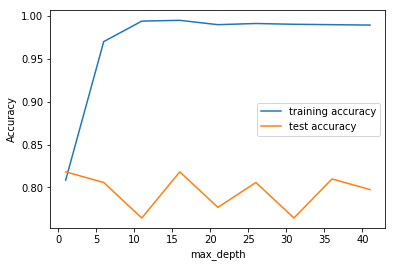

In [7]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### n_estimators

In [8]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'n_estimators': range(1, 35, 5)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 35, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [9]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004106,0.001057,0.001257,0.000194,1,{'n_estimators': 1},0.76,0.72,0.68,0.68,...,0.880184,0.884793,0.898618,0.880734,0.857798,0.872146,0.872146,0.894977,0.881559,0.016037
1,0.006764,0.000566,0.001386,0.000093,6,{'n_estimators': 6},0.80,0.76,0.72,0.84,...,0.976959,0.981567,0.986175,0.977064,0.986239,0.981735,0.986301,0.963470,0.976117,0.012320
2,0.010123,0.000119,0.001696,0.000081,11,{'n_estimators': 11},0.84,0.80,0.76,0.72,...,0.995392,0.986175,0.995392,0.995413,0.990826,0.986301,0.990868,1.000000,0.993115,0.004223
3,0.013860,0.000254,0.001986,0.000072,16,{'n_estimators': 16},0.80,0.80,0.84,0.72,...,1.000000,0.995392,0.995392,0.995413,0.995413,0.995434,1.000000,0.995434,0.996326,0.001837
4,0.017333,0.000196,0.002303,0.000090,21,{'n_estimators': 21},0.84,0.76,0.88,0.76,...,0.995392,1.000000,0.995392,0.990826,1.000000,1.000000,0.995434,1.000000,0.996322,0.003441


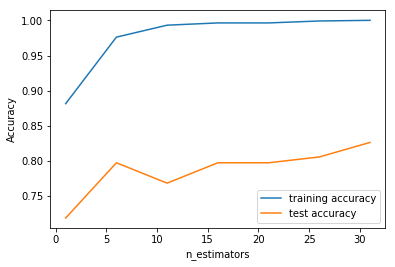

In [10]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### max_features

In [11]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_features': range(1, 15, 4)}

# instantiate the model
rf = RandomForestClassifier(max_depth=6)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': range(1, 15, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [12]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010674,0.002937,0.001843,0.000270,1,{'max_features': 1},0.84,0.72,0.84,0.72,...,0.949309,0.917051,0.940092,0.926606,0.940367,0.936073,0.940639,0.949772,0.934323,0.011935
1,0.009744,0.000213,0.001629,0.000053,5,{'max_features': 5},0.76,0.72,0.76,0.80,...,0.963134,0.972350,0.976959,0.967890,0.986239,0.990868,0.972603,0.995434,0.974713,0.011895
2,0.010395,0.000141,0.001611,0.000045,9,{'max_features': 9},0.72,0.64,0.80,0.72,...,0.981567,0.976959,0.981567,0.963303,0.958716,0.977169,0.977169,0.963470,0.974305,0.008708
3,0.011080,0.000120,0.001593,0.000056,13,{'max_features': 13},0.84,0.68,0.76,0.72,...,0.967742,0.972350,0.981567,0.972477,0.963303,0.981735,0.986301,0.972603,0.977043,0.008218


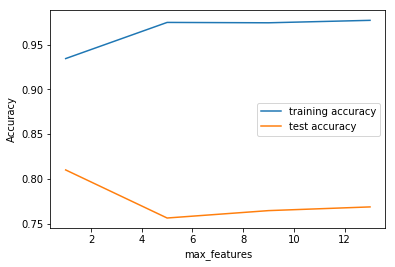

In [13]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_leaf

In [14]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(1, 30, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011450,0.002208,0.001798,0.000166,1,{'min_samples_leaf': 1},0.84,0.80,0.84,0.80,...,0.981567,0.986175,0.995392,0.995413,0.981651,1.000000,1.000000,0.995434,0.991720,0.006764
1,0.009465,0.000682,0.001650,0.000045,6,{'min_samples_leaf': 6},0.88,0.80,0.88,0.76,...,0.907834,0.889401,0.907834,0.912844,0.871560,0.858447,0.876712,0.876712,0.885711,0.019537
2,0.009529,0.000979,0.001864,0.000335,11,{'min_samples_leaf': 11},0.84,0.72,0.84,0.80,...,0.838710,0.857143,0.843318,0.876147,0.871560,0.863014,0.863014,0.876712,0.856704,0.016161
3,0.009434,0.001235,0.001734,0.000201,16,{'min_samples_leaf': 16},0.84,0.84,0.84,0.80,...,0.820276,0.847926,0.852535,0.830275,0.857798,0.872146,0.817352,0.849315,0.842043,0.016532
4,0.009012,0.000382,0.001650,0.000087,21,{'min_samples_leaf': 21},0.80,0.80,0.76,0.84,...,0.801843,0.820276,0.834101,0.779817,0.848624,0.858447,0.831050,0.808219,0.820450,0.025276


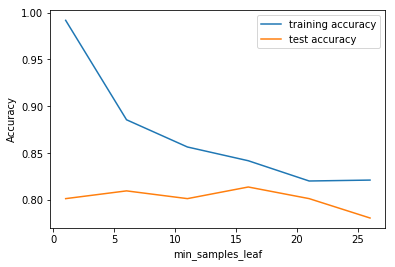

In [16]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_split

In [17]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'min_samples_split': range(2, 100, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 100, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [18]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011051,0.001809,0.001711,0.000174,2,{'min_samples_split': 2},0.72,0.76,0.72,0.80,...,0.981567,1.000000,1.000000,0.990826,0.995413,0.995434,0.995434,0.986301,0.992193,0.005839
1,0.009146,0.000171,0.001634,0.000068,12,{'min_samples_split': 12},0.76,0.84,0.72,0.72,...,0.917051,0.912442,0.944700,0.899083,0.908257,0.913242,0.926941,0.904110,0.919218,0.013963
2,0.009906,0.001613,0.001760,0.000349,22,{'min_samples_split': 22},0.80,0.80,0.84,0.72,...,0.870968,0.889401,0.889401,0.899083,0.903670,0.876712,0.885845,0.881279,0.886594,0.009168
3,0.008855,0.000152,0.001599,0.000059,32,{'min_samples_split': 32},0.88,0.76,0.72,0.72,...,0.880184,0.903226,0.880184,0.848624,0.885321,0.835616,0.821918,0.853881,0.863707,0.023329
4,0.008829,0.000267,0.001601,0.000057,42,{'min_samples_split': 42},0.88,0.76,0.80,0.68,...,0.861751,0.857143,0.857143,0.857798,0.848624,0.858447,0.826484,0.849315,0.848952,0.011388


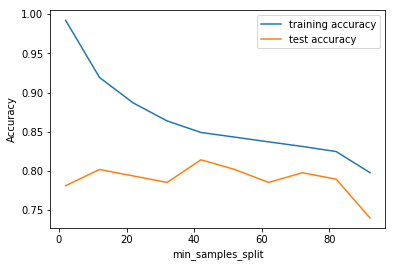

In [19]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Using the tuned parameters to find the best model

In [20]:
# Create the parameter grid based on the results of random search 
n_folds = 10
param_grid = {
    'max_depth': [1,5,10,15,20,25,30,35],
    'min_samples_leaf': range(1, 13, 2),
    'min_samples_split': range(2, 35, 2),
    'n_estimators': range(25, 30, 1), ##this is the number of trees, dtrees don't have this
    'max_features': range(4, 6, 2) ##how many columns you want.
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1)

In [21]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 4080 candidates, totalling 40800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1665 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 3065 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 4865 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7065 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9665 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 12665 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 16065 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 19865 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 24065 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 28665 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 33665 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 39065 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 40800 out

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 15, 20, 25, 30, 35], 'min_samples_leaf': range(1, 13, 2), 'min_samples_split': range(2, 35, 2), 'n_estimators': range(25, 30), 'max_features': range(4, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8512396694214877 using {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 29}


In [56]:
# model with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=7, 
                             min_samples_split=18,
                             max_features=4,
                             n_estimators=29)
rf.fit(X_train, y_train)
print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8719

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       115
           1       0.85      0.92      0.88       127

   micro avg       0.87      0.87      0.87       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242


Confusion Matrix: 
 [[ 94  21]
 [ 10 117]]

Average Accuracy: 	 0.8281
Accuracy SD: 		 0.0695

-----------------------------------------------------

Test Result:

accuracy score: 0.8852

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.90      0.92      0.91        38

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.87      0.88        61
weighted avg       0.88      0.89      0.88        61


Confusion Matrix: 
 [[19  4]
 [ 3 35]]



### After tuning the Random Forest model the accuracy score for the training data: 89.26% with a stdev 0.057

### After tuning the Random Forest model the accuracy score on the test data is: 90.16%

------ 

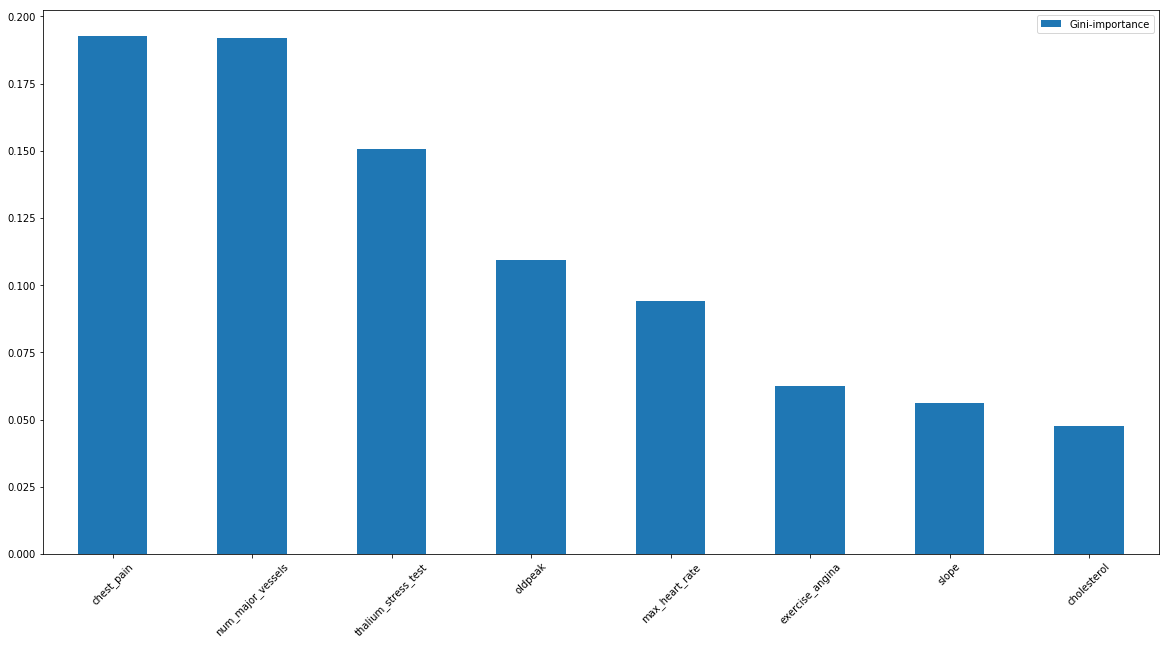

In [24]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending =False).head(8).plot(kind='bar', rot=45, figsize=(20,10));

-------------

# Extreme Gradiant Boosting Tuning

In [25]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier ## here;s the only i'm taking about -- go to anaconda prompt and type pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import GridSearchCV ## same as one we did for Decision trees and RF
from sklearn.model_selection import StratifiedKFold ## k fold cross validation.
from sklearn.preprocessing import LabelEncoder ##same as before.
import matplotlib.pyplot as pyplot

In [26]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
eval_set = [(X_test, y_test)]

#### Tuning XGBoost

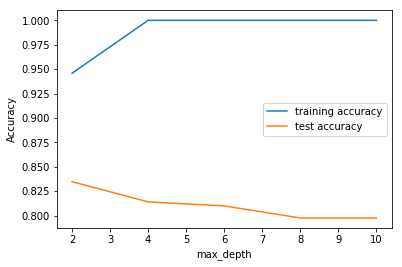

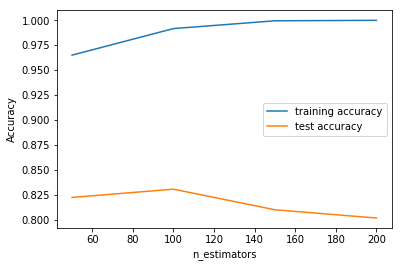

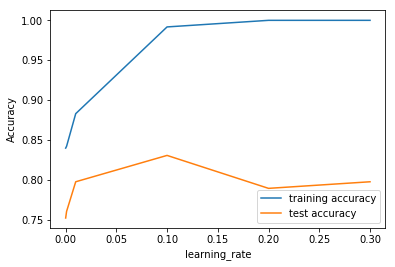

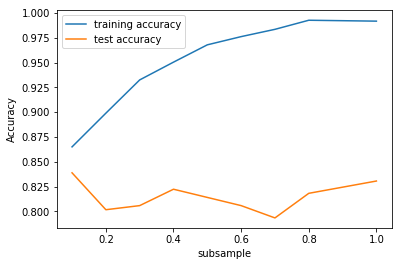

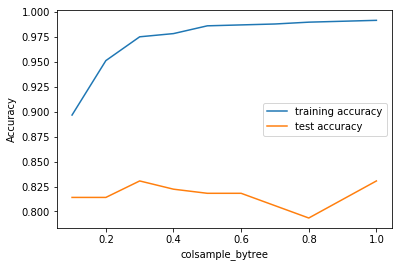

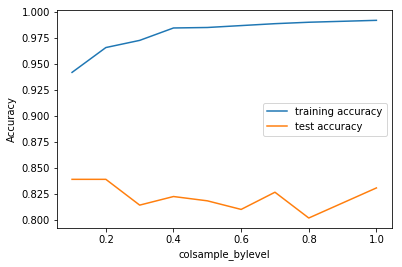

In [28]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
##high learning rate implies more trees needed, low learning rate implies a lesser number of trees are needed.
hyperparameter=['max_depth','n_estimators','learning_rate','subsample','colsample_bytree','colsample_bylevel']

range  =[ 
         [2, 4, 6, 8,10],
         [50, 100, 150, 200],
         [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
]
for var in zip(hyperparameter,range):
    
    parameters = {"{}".format(var[0]): var[1]}
    # instantiate the model
    dtree = XGBClassifier()

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=n_folds, 
                       scoring="accuracy")### you can change scoring functions right here.
    tree.fit(X_train, y_train)
    scores = tree.cv_results_

    plt.figure()
    plt.plot(scores['param_'+var[0]], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores['param_'+var[0]], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(var[0])
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [32]:
n_folds = 10
param_grid = {    
 'max_depth':[2,3,4,5,6,7],
 'n_estimators':[85,90,95,100,105,110,115],
 'learning_rate':[0.08,0.09,0.10,0.11,0.12],
 'subsample':[0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0],
 'colsample_bytree':[ 0.2,0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1.0],
 'colsample_bylevel':[0.1,.02,.03,0.4,0.5,0.6],}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_grid = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 10, n_jobs = -1,verbose = 1)

In [33]:
# Fit the grid search to the data
xgb_grid.fit(X_train, y_train,eval_metric="auc", eval_set=eval_set, verbose=True)

Fitting 10 folds for each of 102060 candidates, totalling 1020600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 985 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 2485 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 4585 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7285 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 10585 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14485 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 18985 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 24085 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 29785 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 36085 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 42985 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 47222 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 49878 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 52778 t

[0]	validation_0-auc:0.84611
[1]	validation_0-auc:0.854119
[2]	validation_0-auc:0.881007
[3]	validation_0-auc:0.882151
[4]	validation_0-auc:0.900458
[5]	validation_0-auc:0.892448
[6]	validation_0-auc:0.87643
[7]	validation_0-auc:0.874142
[8]	validation_0-auc:0.870709
[9]	validation_0-auc:0.871854
[10]	validation_0-auc:0.872998
[11]	validation_0-auc:0.883295
[12]	validation_0-auc:0.885584
[13]	validation_0-auc:0.891304
[14]	validation_0-auc:0.900458
[15]	validation_0-auc:0.899314
[16]	validation_0-auc:0.901602
[17]	validation_0-auc:0.906178
[18]	validation_0-auc:0.909611
[19]	validation_0-auc:0.908467
[20]	validation_0-auc:0.910755
[21]	validation_0-auc:0.910755
[22]	validation_0-auc:0.910755
[23]	validation_0-auc:0.910755
[24]	validation_0-auc:0.908467
[25]	validation_0-auc:0.907323
[26]	validation_0-auc:0.907323
[27]	validation_0-auc:0.907323
[28]	validation_0-auc:0.905034
[29]	validation_0-auc:0.909611
[30]	validation_0-auc:0.910755
[31]	validation_0-auc:0.909611
[32]	validation_0-au

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'n_estimators': [85, 90, 95, 100, 105, 110, 115], 'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12], 'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.1, 0.02, 0.03, 0.4, 0.5, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [35]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',xgb_grid.best_score_,'using',xgb_grid.best_params_)

We can get accuracy of 0.8677685950413223 using {'colsample_bylevel': 0.1, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 95, 'subsample': 1.0}


#### the model with tuned features

In [49]:
# fit with the final parameters
xgbfinal = XGBClassifier(bootstrap=True,
                    subsample= 1.0,
                             n_estimators=95,
                             max_depth=4, 
                             learning_rate=0.1,
                             colsample_bytree=0.9,
                             colsample_bylevel=0.1)
xgbfinal.fit(X_train, y_train, eval_metric="auc")

# make predictions for test data
predictions = xgbfinal.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

print_score(xgbfinal, X_train, y_train, X_test, y_test, train=True)
print_score(xgbfinal, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9669

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       115
           1       0.96      0.98      0.97       127

   micro avg       0.97      0.97      0.97       242
   macro avg       0.97      0.97      0.97       242
weighted avg       0.97      0.97      0.97       242


Confusion Matrix: 
 [[110   5]
 [  3 124]]

Average Accuracy: 	 0.8687
Accuracy SD: 		 0.0607

-----------------------------------------------------

Test Result:

accuracy score: 0.8361

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.91      0.82      0.86        38

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61


Confusion Matrix: 
 [[20  3]
 [ 7 31]]



### Tuned XGBoost Score: 86.87%

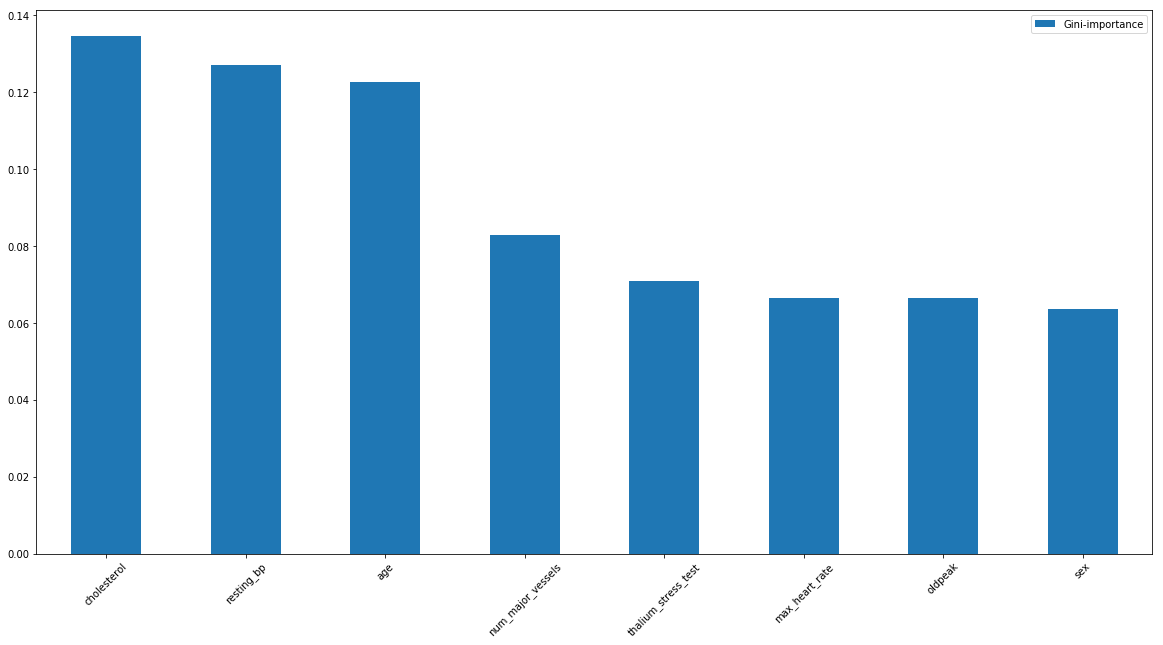

In [37]:
feat = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, xgbfinal.feature_importances_):
    feat[feature] = importance #add the name/value pair 

importance = pd.DataFrame.from_dict(feat, orient='index').rename(columns={0: 'Gini-importance'})
importance.sort_values(by='Gini-importance', ascending =False).head(8).plot(kind='bar', rot=45, figsize=(20,10));

### When Random Forest is tuned the top feature is chest pain but with XGB it is cholesterol.

-----

# Random forest with AdaBoost

    

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics

In [183]:
X=pd.read_csv('X_train.csv',  index_col=0)
y=pd.read_csv('y_train.csv', header=-1, index_col=0)

X=X.reset_index()
y=y.reset_index()

X.drop(X.columns[[0]],axis=1, inplace=True)
y.drop(y.columns[[0]],axis=1, inplace=True)

In [184]:
# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [185]:
# adaboost with the tree as base estimator

estimators = [1,2,3,4,5,6,7,8,9,10]

ada_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    ada_scores.append(score)
print(ada_scores,'\nthe best baseline score: ',max(ada_scores)) 
    

[0.9016393442622951, 0.8524590163934426, 0.8360655737704918, 0.8688524590163934, 0.8524590163934426, 0.8360655737704918, 0.8360655737704918, 0.8688524590163934, 0.8360655737704918, 0.8360655737704918] 
the best baseline score:  0.9016393442622951


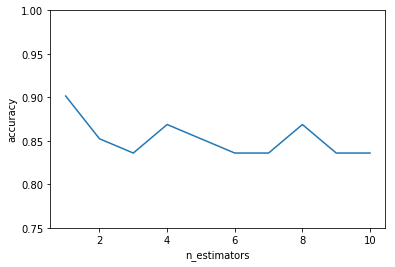

In [187]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, ada_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.75, 1])
plt.show()

In [193]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 10
estimators=np.arange(1,20,2)

# parameters to build the model on
parameters = {'n_estimators': (estimators)}

# instantiate the model
rftree = AdaBoostClassifier()

# fit tree on training data
adagrid = GridSearchCV(rftree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
adagrid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [194]:
# scores of GridSearch CV
ada_scores = adagrid.cv_results_
pd.DataFrame(ada_scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003681,0.000833,0.001339,0.000488,1,{'n_estimators': 1},0.76,0.60,0.84,0.72,...,0.755760,0.769585,0.778802,0.756881,0.766055,0.748858,0.762557,0.757991,0.764488,0.010079
1,0.005019,0.000850,0.001231,0.000257,3,{'n_estimators': 3},0.80,0.72,0.88,0.72,...,0.829493,0.847926,0.838710,0.839450,0.844037,0.826484,0.803653,0.831050,0.829675,0.015937
2,0.006247,0.000128,0.001264,0.000069,5,{'n_estimators': 5},0.76,0.72,0.76,0.60,...,0.834101,0.861751,0.852535,0.862385,0.839450,0.849315,0.826484,0.840183,0.843901,0.011490
3,0.008330,0.000395,0.001484,0.000077,7,{'n_estimators': 7},0.72,0.80,0.80,0.68,...,0.861751,0.861751,0.852535,0.876147,0.839450,0.867580,0.844749,0.867580,0.856739,0.012884
4,0.009933,0.000076,0.001606,0.000032,9,{'n_estimators': 9},0.80,0.80,0.76,0.76,...,0.870968,0.870968,0.870968,0.876147,0.844037,0.858447,0.849315,0.872146,0.862728,0.011191


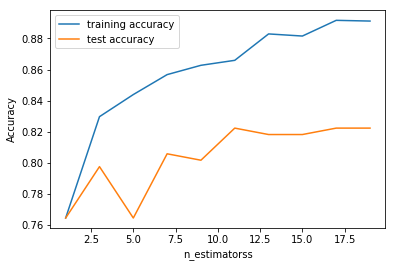

In [195]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(ada_scores["param_n_estimators"], 
         ada_scores["mean_train_score"], 
         label="training accuracy")
plt.plot(ada_scores["param_n_estimators"], 
         ada_scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimatorss")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

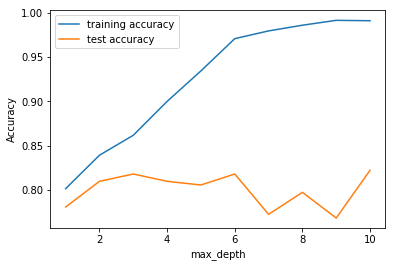

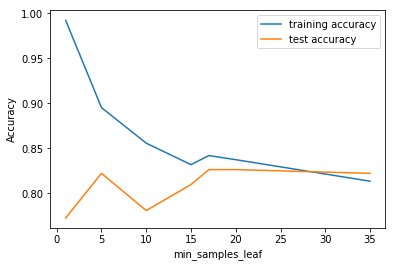

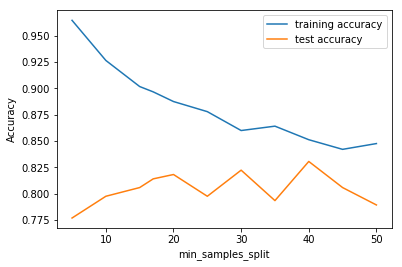

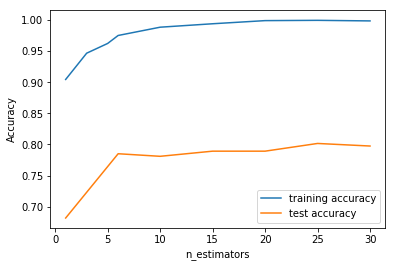

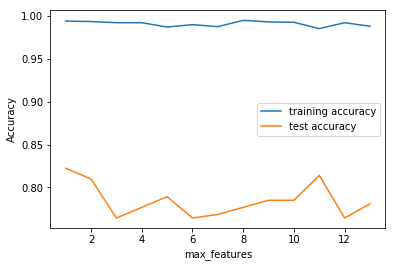

In [197]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on

hyperparameter=['max_depth','min_samples_leaf','min_samples_split','n_estimators','max_features']
range  =[ [1,2,3,4,5,6,7,8,9,10],[1,5,10,15,17,20,35],[5,10,15,17,20,25,30,35,40,45,50],[1,3,5,6,10,15,20,25,30]
         ,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
for var in zip(hyperparameter,range):
    
    parameters = {"{}".format(var[0]): var[1]}
    # instantiate the model
    dtree = RandomForestClassifier()

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=n_folds, 
                       scoring="accuracy")
    tree.fit(X_train, y_train)
    scores = tree.cv_results_

    plt.figure()
    plt.plot(scores['param_'+var[0]], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores['param_'+var[0]], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(var[0])
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


In [210]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1],
    'min_samples_leaf': [5,10,15,20,30,40],
    'min_samples_split': [5,10,20,30,40,50],
    'n_estimators': [5,10,15,20,25,30], 
    'max_features': [1]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1,verbose = 1)

In [211]:
grid_search.fit(X_train, y_train)
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


We can get accuracy of 0.8305785123966942 using {'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 25}


[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    4.3s finished


In [212]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=1,
                             min_samples_leaf=20, 
                             min_samples_split=30,
                             max_features=1,
                             n_estimators=25)

In [214]:
# adaboost with the rfc as base estimator

estimators=np.arange(1,100,2)

ada_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=rfc, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    ada_scores.append(score)
print('\nthe best baseline score: ',max(ada_scores))     


the best baseline score:  0.9344262295081968


###  When boosting Random Forest model, the score jumped from 87.19% to 93.44%